En desarrollo

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [13]:
df = pd.read_csv('../../datasets/channel_44_46.csv', index_col=0, parse_dates=True)


In [ ]:
df.drop(columns=['channel_44_anomalyId', 'channel_45_anomalyId', 'channel_46_anomalyId'], inplace=True)
df["is_anomaly"] = df[['channel_44_isAnomaly', 'channel_45_isAnomaly', 'channel_46_isAnomaly']].max(axis=1)
df.drop(columns=['channel_44_isAnomaly', 'channel_45_isAnomaly', 'channel_46_isAnomaly'], inplace=True)

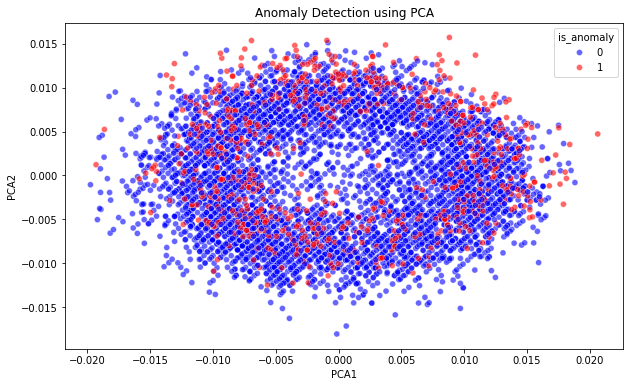

In [21]:
pca = PCA(n_components=2)
components = pca.fit_transform(df[['channel_44', 'channel_45', 'channel_46']])
df_pca = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'], index=df.index)
df_pca['is_anomaly'] = df['is_anomaly'] 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='is_anomaly', palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Anomaly Detection using PCA')
plt.show()
